<a href="https://colab.research.google.com/github/jaafar19/NLP/blob/main/TopicModelingLDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2025-04-06 14:55:36--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  --.-KB/s    in 0.1s    

2025-04-06 14:55:36 (50.2 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
stops = set(stopwords.words('english'))

In [5]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [7]:
stops=stops.union({'said','would','one','two','could','told','also','mr','new','year'})

In [8]:
df = pd.read_csv('bbc_text_cls.csv')

In [9]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [12]:
# Convert the 'stops' set to a list
stop_words_list = list(stops)

# Now create the CountVectorizer with the list of stop words
vectorizer = CountVectorizer(stop_words=stop_words_list)
X = vectorizer.fit_transform(df['text'])

In [13]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 340920 stored elements and shape (2225, 29270)>

In [14]:
lda = LatentDirichletAllocation(n_components=10, random_state=12345)

In [15]:
lda.fit(X)

LatentDirichletAllocation(random_state=12345)

In [17]:
def plot_top_words(model, features_names, n_top_words=10):
  fig , axes = plt.subplots(2,5,figsize=(30,15),sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [features_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]
    ax = axes[topic_idx]
    ax.barh(top_features,weights,height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',fontdict={'fontsize':30})
    ax.invert_yaxis
    ax.tick_params(axis='both',which='major',labelsize=20)
    for i in 'top right left'.split():
      ax.spines[i].set_visible(False)
    fig.suptitle('Topics',fontsize=40)
  plt.subplots_adjust(top=0.90,bottom=0.05,wspace=0.90,hspace=0.3)
  plt.show()

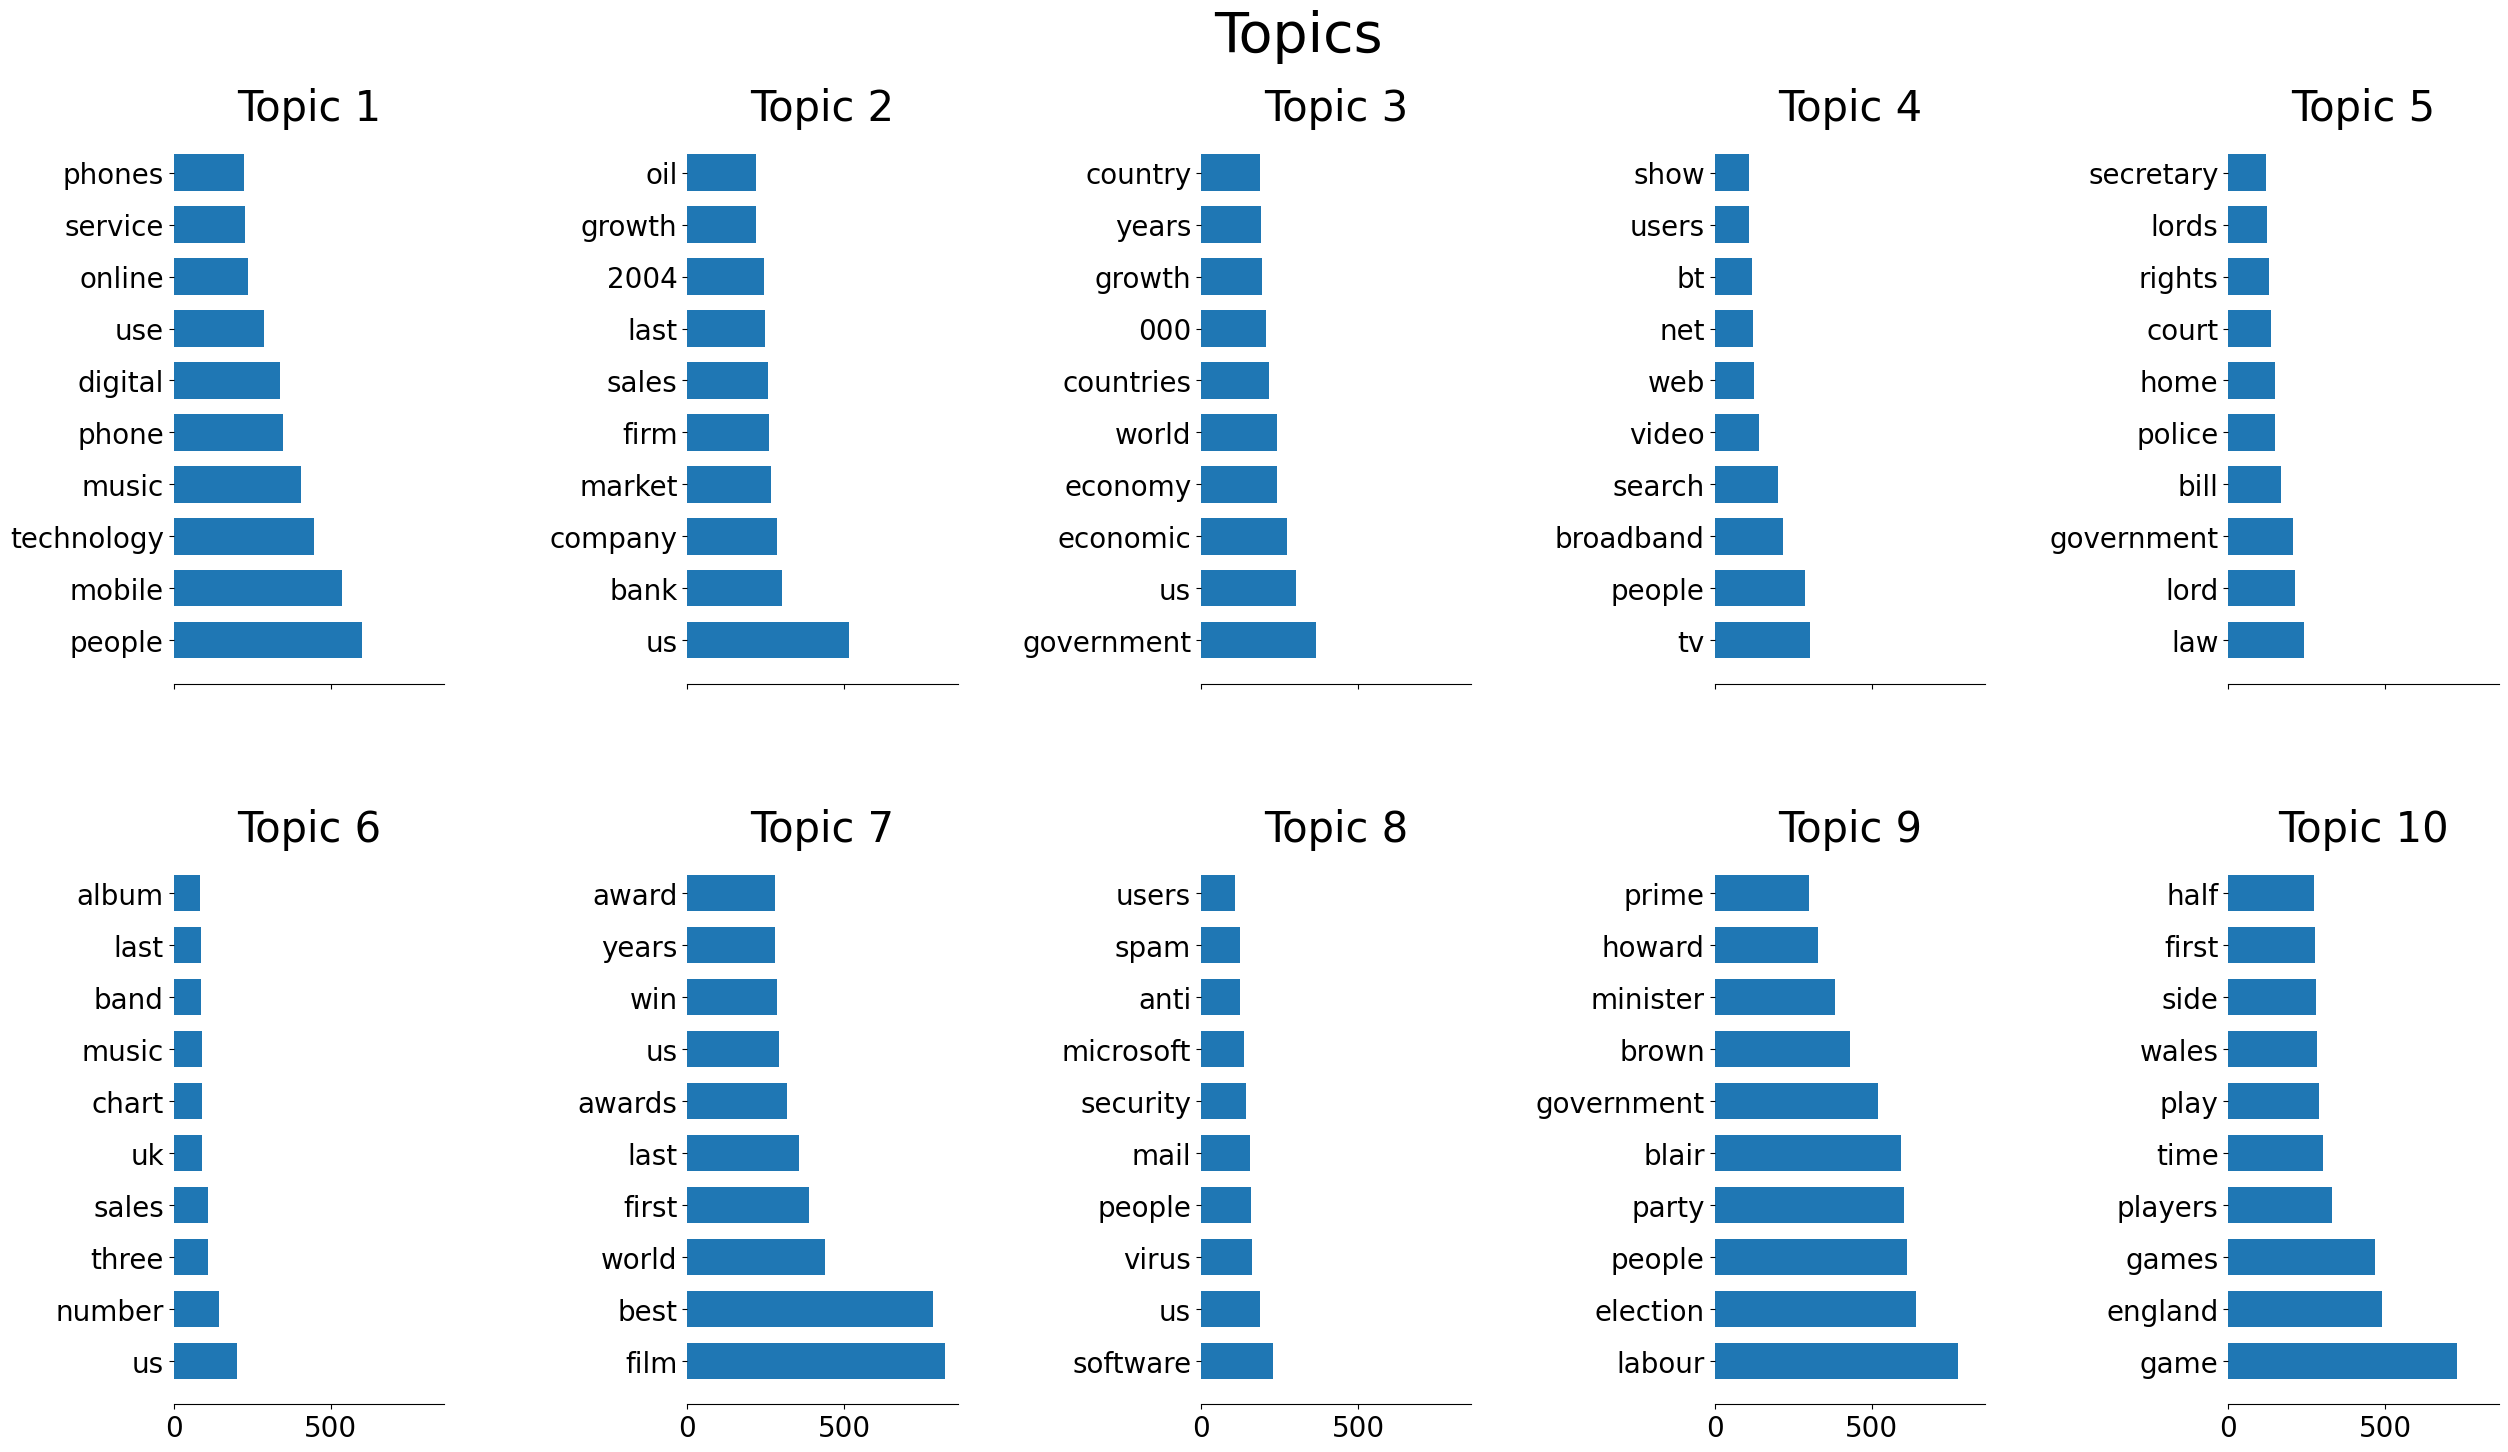

In [18]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda,feature_names)

In [19]:
z = lda.transform(X)

Text(0.5, 1.0, 'True Label: sport')

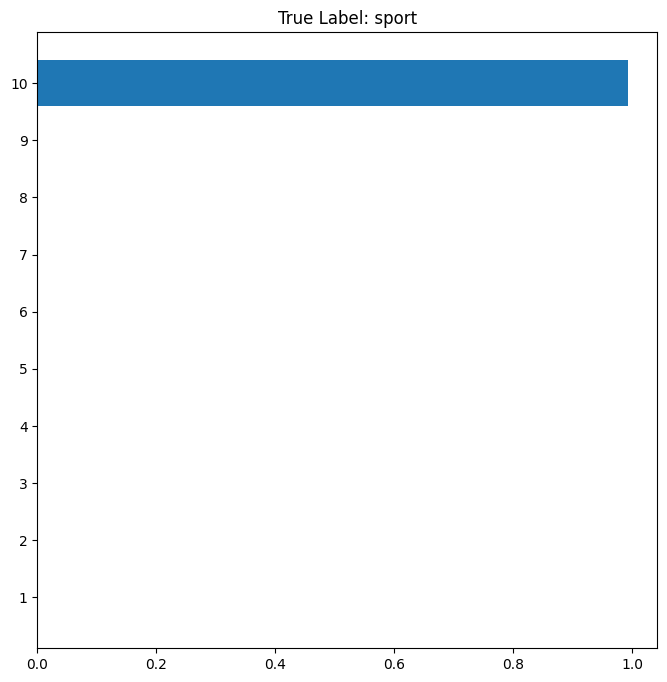

In [23]:
np.random.seed(0)
i = np.random.choice(len(df))
Z=z[i]
topics = np.arange(10)+1
fig , ax = plt.subplots(1,1,figsize=(8,8))
ax.barh(topics,Z)
ax.set_yticks(topics)
ax.set_title('True Label: %s' % df.loc[i]['labels'])


In [24]:
def wrap(x):
  return textwrap.fill(x,replace_whitespace=False,fix_sentence_endings=True)
print(wrap(df.loc[i]['text']))

Charvis set to lose fitness bid

Flanker Colin Charvis is unlikely to
play any part in Wales' final two games of the Six Nations.

Charvis
has missed all three of Wales' victories with an ankle injury and his
recovery has been slower than expected.  "He will not figure in the
Scotland game and is now thought unlikely to be ready for the final
game," said Wales physio Mark Davies.  Sonny Parker is continuing to
struggle with a neck injury, but Hal Luscombe should be fit for the
Murrayfield trip.  Centre Parker has only a "slim chance" of being
involved against the Scots on 13 March, so Luscombe's return to
fitness after missing the France match with hamstring trouble is a
timely boost.

Said Wales assistant coach Scott Johnson: "We're
positive about Hal and hope he'll be raring to go.  "He comes back
into the mix again, adds to the depth and gives us other options.  "
Replacement hooker Robin McBryde remains a doubt after picking up knee
ligament damage in Paris last Saturday.  "We're g

Text(0.5, 1.0, 'True Label: entertainment')

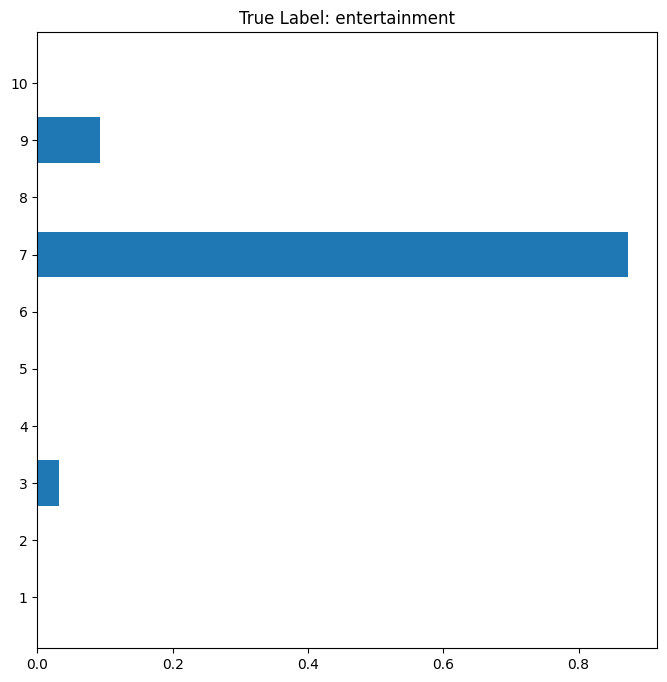

In [25]:
i = np.random.choice(len(df))
Z=z[i]
fig , ax = plt.subplots(1,1,figsize=(8,8))
ax.barh(topics,Z)
ax.set_yticks(topics)
ax.set_title('True Label: %s' % df.loc[i]['labels'])

In [26]:
print(wrap(df.loc[i]['text']))

Oscars steer clear of controversy

The Oscars nominations list has
left out some of the most controversial films of the past year in
favour of safer, less contentious cinema.

If best film nominees were
drawn on the basis of column inches, two of the front-runners would
have had to be Michael Moore's Bush-baiting documentary Fahrenheit
9/11 and Mel Gibson's The Passion of the Christ.  Both films polarised
opinion but had critics talking, and the public turning up to see them
- Fahrenheit 9/11 breaking US box office records for a documentary,
and The Passion of the Christ making more than US$370m (£196m) in the
US alone.  But this year's Academy Awards have shied away from the big
name controversies, with The Passion of the Christ - a film accused of
being anti-Semitic - receiving nominations only in the 'minor'
categories of cinematography, makeup and musical score.

Fahrenheit
9/11 has also been overlooked, despite winning the Palme d'Or at the
Cannes International Film Festival in 20